In [540]:
import pandas as pd

In [541]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [542]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [543]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [544]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [545]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [546]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [547]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [548]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2491,충청남도,202212,0.0218,N,N,N,-2.2,3.1,-6.9,3.8
2492,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2493,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2494,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2495,제주특별자치도,202212,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [549]:
# 'STD_YYYYMM'을 인덱스로 사용
result_df['STD_YYYYMM'] = pd.to_datetime(result_df['STD_YYYYMM'], format='%Y%m')
result_df = result_df.set_index('STD_YYYYMM')

In [550]:
result_df.tail(2)

,SIDO,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,,
2022-12-01,경상북도,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2022-12-01,제주특별자치도,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [551]:
# 그룹별로 NaN 값을 평균값으로 대체
result_df['AVG_오존'] = result_df.groupby(['SIDO', 'STD_YYYYMM'])['AVG_오존'].transform(lambda x: x.fillna(x.mean()))
# 필요한 경우, 여전히 NaN 값이 있는 경우에 대비해 전체 평균값으로 대체할 수도 있습니다
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean())
result_df.isna().sum()

SIDO          0
AVG_오존        0
오존_BAD        0
오존0.06_BAD    0
오존0.1_BAD     0
평균기온          0
평균최고기온        0
평균최저기온        0
평균증기압         0
dtype: int64

In [ ]:
# 원-핫 인코딩 수행
sido_one_hot = pd.get_dummies(result_df['SIDO'])

# 원-핫 인코딩된 데이터프레임을 원래의 데이터프레임에 병합
result_df = pd.concat([result_df, sido_one_hot], axis=1)

# 원래의 'SIDO' 열 삭제
result_df.drop('SIDO', axis=1, inplace=True)

In [ ]:
result_df.head()

,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압,경기도,경상남도,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
STD_YYYYMM,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.011,N,N,N,-4.5,-0.7,-8.1,3.1,False,False,...,False,True,False,False,False,False,False,False,False,False
2010-01-01,0.021,N,N,N,3.0,7.7,-1.1,3.5,False,False,...,True,False,False,False,False,False,False,False,False,False
2010-01-01,0.014,N,N,N,0.0,5.0,-4.3,3.1,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-01,0.014,N,N,N,-3.9,-0.3,-7.4,3.4,False,False,...,False,False,False,False,True,False,False,False,False,False
2010-01-01,0.017,N,N,N,0.5,5.1,-3.3,4.5,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
result_df = result_df.loc[:, ~result_df.columns.str.contains('BAD')]


In [ ]:
result_df.head(2)

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압,경기도,경상남도,경상북도,광주광역시,대구광역시,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
STD_YYYYMM,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.011,-4.5,-0.7,-8.1,3.1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2010-01-01,0.021,3.0,7.7,-1.1,3.5,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:


# 데이터를 오존 피처와 오존을 제외한 피처로 나누기
ozone_feature = result_df['AVG_오존'].values.reshape(-1, 1)
other_features = result_df.drop('AVG_오존', axis=1).values

# 각 데이터셋을 스케일링
scaler_ozone = MinMaxScaler(feature_range=(0, 1))
scaler_other = MinMaxScaler(feature_range=(0, 1))

ozone_scaled = scaler_ozone.fit_transform(ozone_feature)
other_scaled = scaler_other.fit_transform(other_features)

# 가중치 적용
ozone_weight = 0.8
other_weight = 0.2
weighted_ozone = ozone_weight * ozone_scaled
weighted_other = other_weight * other_scaled

# 가중치가 적용된 피처들을 합치기
# 여기서 weighted_other에 대한 축을 맞추기 위해 np.tile을 사용할 수 있습니다
weighted_other_tiled = np.tile(weighted_other, (1, weighted_ozone.shape[1]))
weighted_features = weighted_ozone + weighted_other_tiled

# 타겟 변수 스케일링
target = result_df['AVG_오존'].values.reshape(-1, 1)
scaler_target = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler_target.fit_transform(target)

# 시계열 데이터셋 생성 함수
def create_dataset(features, target, look_back=792):
    dataX, dataY = [], []
    for i in range(len(features) - look_back - 1):
        a = features[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(target[i + look_back, 0]) 
    return np.array(dataX), np.array(dataY)


look_back = 792
trainX, trainY = create_dataset(weighted_features, target_scaled, look_back)

# 데이터셋 분할
train_size = int(len(trainX) * 0.8)
test_size = len(trainX) - train_size
trainX, testX = trainX[:train_size], trainX[train_size:]
trainY, testY = trainY[:train_size], trainY[train_size:]

# LSTM에 맞게 데이터 형태 변환
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], weighted_features.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], weighted_features.shape[1]))

In [ ]:
# 데이터셋의 총 컬럼 수에서 타겟 변수의 컬럼을 제외하여 특성 수를 계산
num_features = len(result_df.columns) - 1  # 타겟 변수를 제외한 특성의 수

# Stacked LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, num_features), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 792, 64)           21760     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 34209 (133.63 KB)
Trainable params: 34209 (133.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=1)


Epoch 1/100
43/43 [==============================] - 26s 488ms/step - loss: 0.0614 - val_loss: 0.0114
Epoch 2/100
43/43 [==============================] - 20s 460ms/step - loss: 0.0113 - val_loss: 0.0086
Epoch 3/100
43/43 [==============================] - 20s 474ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 4/100
43/43 [==============================] - 22s 507ms/step - loss: 0.0111 - val_loss: 0.0087
Epoch 5/100
43/43 [==============================] - 21s 481ms/step - loss: 0.0106 - val_loss: 0.0082
Epoch 6/100
43/43 [==============================] - 20s 461ms/step - loss: 0.0107 - val_loss: 0.0081
Epoch 7/100
43/43 [==============================] - 20s 462ms/step - loss: 0.0098 - val_loss: 0.0077
Epoch 8/100
43/43 [==============================] - 20s 465ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 9/100
43/43 [==============================] - 22s 521ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 10/100
43/43 [==============================] - 21s 487ms/step - loss: 0.008

KeyboardInterrupt: 

In [ ]:
last_known_data = testX[-1].reshape(1, look_back, -1)


In [ ]:
nan_indices = np.isnan(last_known_data)
nan_count = np.sum(nan_indices)
print(f"NaN 값 수: {nan_count}")

NaN 값 수: 0


In [ ]:
# 데이터프레임으로부터 NaN 값 확인
nan_check = result_df.isna().sum()
print(nan_check)

AVG_오존    0
평균기온      0
평균최고기온    0
평균최저기온    0
평균증기압     0
dtype: int64


In [ ]:
# 마지막으로 알려진 데이터 포인트를 초기 입력으로 사용
last_known_data = testX[-1].reshape(1, look_back, -1)

# 2023년부터 2030년까지 매월 오존 수치 예측 (8년 * 12개월)
future_steps = 8 * 12
future_predictions = []

current_step = last_known_data
for _ in range(future_steps):
    # 현재 데이터로부터 다음 단계 예측
    next_prediction = model.predict(current_step)
    future_predictions.append(next_prediction[0, 0])

    # 예측 결과를 다음 입력 데이터로 사용
    next_step = np.zeros((1, look_back, current_step.shape[2]))
    next_step[0, :-1, :] = current_step[0, 1:, :]
    next_step[0, -1, :] = np.hstack((next_prediction.flatten(), current_step[0, -1, 1:]))
    current_step = next_step

# 예측된 데이터를 원래 스케일로 역변환
future_predictions_scaled = np.array(future_predictions).reshape(-1, 1)
future_predictions_original = scaler_target.inverse_transform(future_predictions_scaled)

# 미래 예측값 출력
print(future_predictions_original)


1/1 [==============================] - 0s 19ms/step
[[0.0253719 ]
 [0.02682429]
 [0.02679528]
 [0.02713173]
 [0.02731835]
 [0.02736875]
 [0.02741472]
 [0.02743304]
 [0.02744158]
 [0.02744613]
 [0.02744813]
 [0.0274491 ]
 [0.02744957]
 [0.02744979]
 [0.0274499 ]
 [0.02744994]
 [0.02744997]
 [0.02744998]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.02744999]
 [0.027449

In [ ]:
# 미래 예측값을 데이터프레임에 추가 (인덱스를 'STD_YYYYMM'으로 지정)
future_dates = pd.date_range(start='2023-01-01', periods=len(future_predictions_original), freq='M')
future_data = pd.DataFrame({'AVG_오존': future_predictions_original.flatten()}, index=future_dates)

# 기존 데이터프레임에 미래 데이터 추가
result_df = pd.concat([result_df, future_data])

In [ ]:
result_df.tail()

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
2030-08-31,0.02745,NaN,NaN,NaN,NaN
2030-09-30,0.02745,NaN,NaN,NaN,NaN
2030-10-31,0.02745,NaN,NaN,NaN,NaN
2030-11-30,0.02745,NaN,NaN,NaN,NaN
2030-12-31,0.02745,NaN,NaN,NaN,NaN


C:\Users\human\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON})

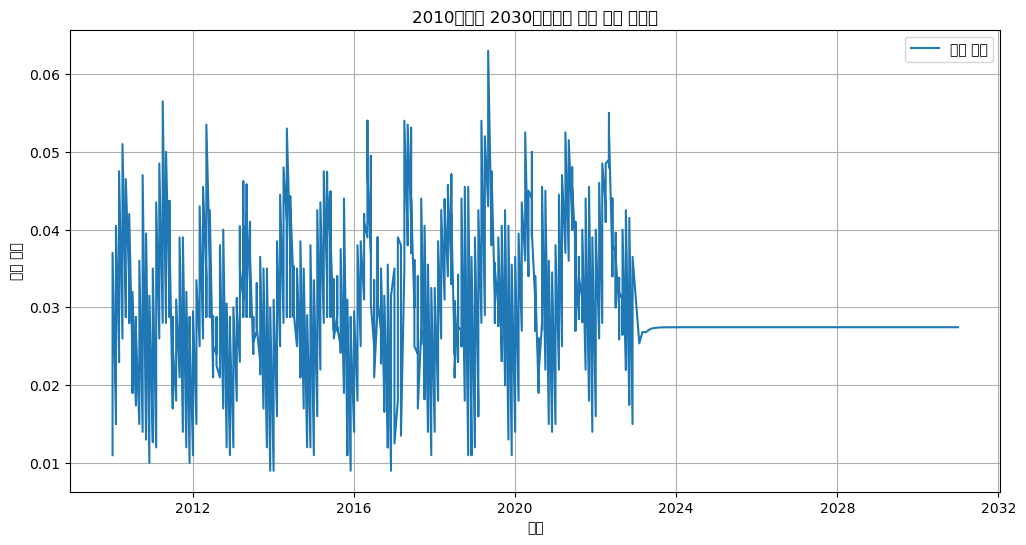

In [ ]:
import matplotlib.pyplot as plt

# 2010년부터 2030년까지의 데이터 선택
start_date = '2010-01-01'
end_date = '2030-12-31'
selected_data = result_df[start_date:end_date]

# 선택된 데이터에서 오존 농도 열 추출
ozone_data = selected_data['AVG_오존']

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(ozone_data.index, ozone_data.values, label='오존 농도')
plt.xlabel('날짜')
plt.ylabel('오존 농도')
plt.title('2010년부터 2030년까지의 오존 농도 그래프')
plt.legend()
plt.grid(True)
plt.show()